In [51]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
# settings
CMAP = 'viridis'
dim = 4

In [65]:
# import node embeddings
df = pd.read_csv(
    f"./facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [66]:
# import train
train = pd.read_csv("./facebook_train.csv", index_col=0)
train

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [67]:
# import predicted labels
labels = np.genfromtxt(f"./labels_pred_BGMM_d{dim}_k10.txt")
labels

,label
0,8
1,8
2,8
3,8
4,8
...,...
3959,9
3960,9
3961,9
3962,9


In [79]:
df['label'] = labels.label.values

array([8., 8., 8., ..., 9., 9., 9.])

In [ ]:
df

In [80]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

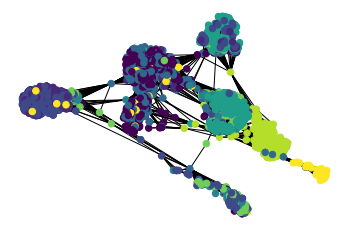

In [58]:
# plot spring graph
plt.axis("off")
nx.draw_networkx(G,
                 node_color=labels.label,
                 cmap=plt.get_cmap(CMAP),
                 with_labels=False,
                 node_size=42)
plt.savefig(f"./graph_d{dim}.png")


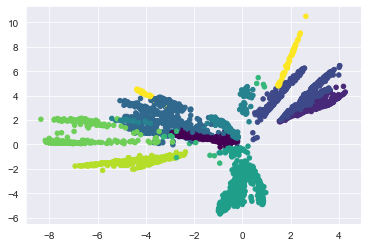

In [59]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=labels.label, marker="o", cmap=CMAP)